# Analysing German credit card dataset 

Goal : The goal is the classify the applicant into one of two categories, good or bad, which is the last attribute

In [100]:
# Loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.display import display_html
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
# importing the dataset
df = pd.read_csv('german_credit_data_dataset.csv')
DF = df.copy()
DF.head(10)
# Head function will give the first 5 rows with all the column values
# Most of the features contains code, we need to work on this

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
5,A14,36,A32,A46,9055.0,A65,A73,2.0,A93,A101,...,A124,35.0,A143,A153,1.0,A172,2,A192,A201,1
6,A14,24,A32,A42,2835.0,A63,A75,3.0,A93,A101,...,A122,53.0,A143,A152,1.0,A173,1,A191,A201,1
7,A12,36,A32,A41,6948.0,A61,A73,2.0,A93,A101,...,A123,35.0,A143,A151,1.0,A174,1,A192,A201,1
8,A14,12,A32,A43,3059.0,A64,A74,2.0,A91,A101,...,A121,61.0,A143,A152,1.0,A172,1,A191,A201,1
9,A12,30,A34,A40,5234.0,A61,A71,4.0,A94,A101,...,A123,28.0,A143,A152,2.0,A174,1,A191,A201,2


In [3]:
# How many Observations and input feautes
DF.shape

(1000, 21)

- 1000 observartion and 20 input columns and 1 output columns

In [4]:
DF.info()
# There is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   personal                 1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251FF9A5EC8>,
      dtype=object)

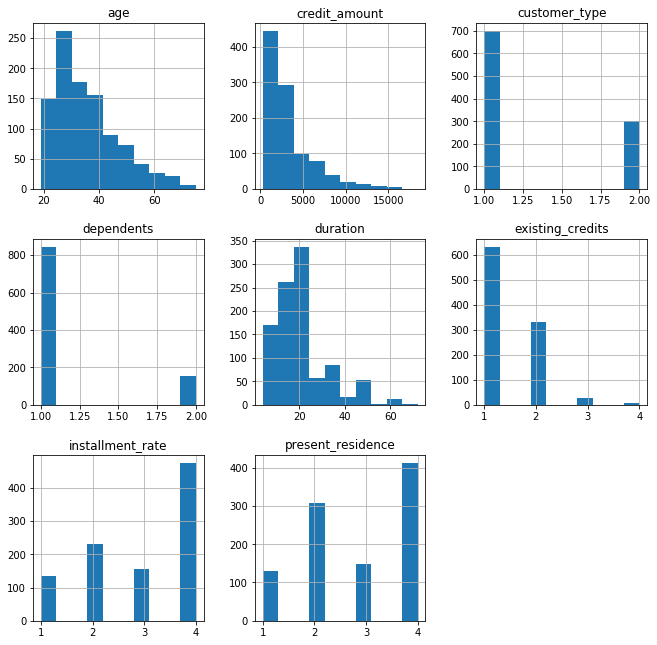

In [5]:
DF[DF.dtypes[(DF.dtypes=='float64')|(DF.dtypes=='int64')].index.values].hist(figsize = (11,11))

- we can classify the features as follows

### Variable and types

### Variable type : Continuos
- Age
- Credit Amount
- Duration

### Variable type : Ordinal
- checking_account_status
- savings
- present_employment
- installment_rate
- present_residence 

### Variable type : Nominal
- credit_history
- purpose
- personal
- other_debtors
- property
- other_installment_plans
- housing
- job

### Variable type : Binary
- existing_credits
- dependents
- telephone
- foreign_worker
- customer_type

In [6]:
# Missing value %
# Alternate way to find the missing value % column wise
# Here we dont have missing values
# DF.isna().mean().round(4)*100

In [7]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
customer_type,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


In [8]:
# Before diving to analysis, We will work on the labels of some variables for easy understanding

# Feature : checking_account_status
# A11: < 0 DM
# A12: 0 <= x < 200 DM
# A13 : >= 200 DM / salary assignments for at least 1 year
# A14 : no checking account
DF['checking_account_status'].replace({'A11':'low','A12':'medium','A13':'high','A14':'none'}, inplace = True)

# Feature : credit_history
# A30 : no credits taken/ all credits paid back duly
# A31 : all credits at this bank paid back duly
# A32 : existing credits paid back duly till now
# A33 : delay in paying off in the past
# A34 : critical account/ other credits existing (not at this bank)
DF['credit_history'].replace({'A30':'No Credits','A31':'Paid Credits','A32':'Existing Credits','A33':'Delay in Past','A34':'Critical'}, inplace = True)

# Feature : purpose
# A40 : car (new)
# A41 : car (used)
# A42 : furniture/equipment
# A43 : radio/television
# A44 : domestic appliances
# A45 : repairs
# A46 : education
# A47 : (vacation - does not exist?)
# A48 : retraining
# A49 : business
# A410 : others
DF['purpose'].replace({'A40':'new car','A41':'used car','A42':'furniture/equipment','A43':'radio/television',\
                        'A44':'domestic appliances','A45':'repairs','A46':'education','A47':'(vacation - does not exist?)',\
                        'A48':'retraining','A49':'business','A410':'others'}, inplace = True)

# Feature : Savings (Balance in savings account)
# A61 : < 100 DM, 
# A62 : 100 <= x < 500 DM
# A63 : 500 <= x < 1000 DM
# A64 : >= 1000 DM
# A65 : unknown/ no savings account
DF['savings'].replace({'A61':'low','A62':'medium','A63':'high','A64':'very high','A65':'no savings'}, inplace = True)

# Feature : Present Employment
# A71 : unemployed
# A72 : < 1 year
# A73 : 1 <= x < 4 years
# A74 : 4 <= x < 7 years
# A75 : .. >= 7 years
DF['present_employment'].replace({'A71':'Unemployed','A72':'low','A73':'medium','A74':'senior','A75':'high'}, inplace = True)

# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single
DF['personal'].replace({'A91':'male divorced','A92':'female divorced','A93':'male single','A94':'male married','A95':'female single'}, inplace = True)

# Feature : Other Debtors
# A101 : none
# A102 : co-applicant
# A103 : guarantor
DF['other_debtors'].replace({'A101':'none','A102':'co-applicant','A103':'guarantor'}, inplace = True)

# Feature : Property
# A121 : real estate
# A122 : if not A121 : building society savings agreement/ life insurance
# A123 : if not A121/A122 : car or other, not in attribute 6
# A124 : unknown / no property
DF['property'].replace({'A121':'real estate','A122':'life insurance','A123':'car or other','A124':'no property'}, inplace = True)

# Features : Housing
# A151 : rent
# A152 : own
# A153 : for free
DF['housing'].replace({'A151':'rent','A152':'own','A153':'free'}, inplace = True)

# Feature : Job
# A171 : unemployed/ unskilled - non-resident
# A172 : unskilled - resident
# A173 : skilled employee / official
# A174 : management/ self-employed/highly qualified employee/ officer
DF['job'].replace({'A171':'unskilled - non-resident','A172':'unskilled - resident','A173':'skilled employee','A174':'management/officer'}, inplace = True)
DF['telephone'].replace({'A191':'none','A192':'yes'}, inplace = True)
DF['foreign_worker'].replace({'A201':'yes','A202':'no'}, inplace = True)
DF['other_installment_plans'].replace({'A141':'bank','A142':'stores','A143':'none'}, inplace = True)

# Grouping age
DF['age_group'] = np.nan
DF.loc[(DF['age'] > 18) & (DF['age']<= 29),'age_group'] = 'young'
DF.loc[(DF['age'] > 29) & (DF['age'] <= 45), 'age_group'] = 'middle'
DF.loc[(DF['age'] > 45) & (DF['age'] <= 55), 'age_group'] = 'old'
DF.loc[(DF['age'] > 55),'age_group'] = 'elder'

In [9]:
# Let's start the analysis with some basic questions with Target variable customer type

# What is the data type of target variable ?
DF['customer_type'].dtypes
# int 64

# What are the values in target
DF['customer_type'].unique()
# 1 and 2 are the values in target

# This confirms that we are dealing with Binary classification problem
# 1: Good risk customer
# 2: Bad risk customer

array([1, 2], dtype=int64)

customer_type,1,2
personal,,
female divorced,201,109
male divorced,30,20
male married,67,25
male single,402,146


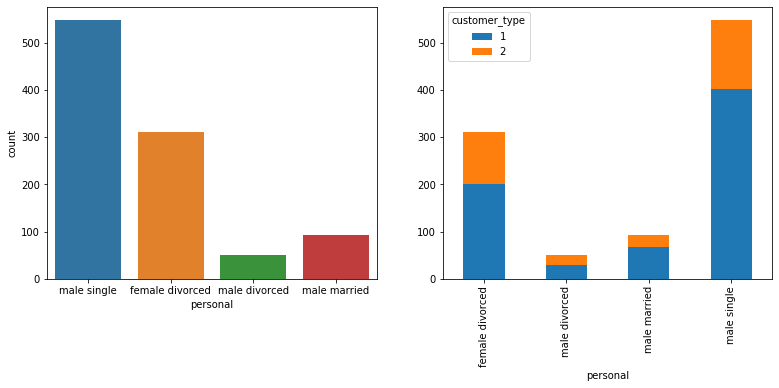

In [10]:
# What is the propotion of genders 

fig,axes = plt.subplots(1,2,figsize = (13,5))
sns.countplot(DF.personal, ax=axes[0])

Gender_wise = DF.groupby(['personal', 'customer_type']).size().reset_index().pivot(columns='customer_type', index='personal', values=0)
Gender_wise.plot(kind = 'bar', stacked = True, ax = axes[1])

display_side_by_side(Gender_wise)

Summary
- Most of the customers are male (70%) in applying the credits when compared to female
- Only female who got divorced has applied the credit 
- more than 50% of female and male single customers are classified as good risk

checking_account_status,high,low,medium,none
personal,,,,
female divorced,20,88,86,116
male divorced,6,17,14,13
male married,4,21,34,33
male single,33,148,135,232


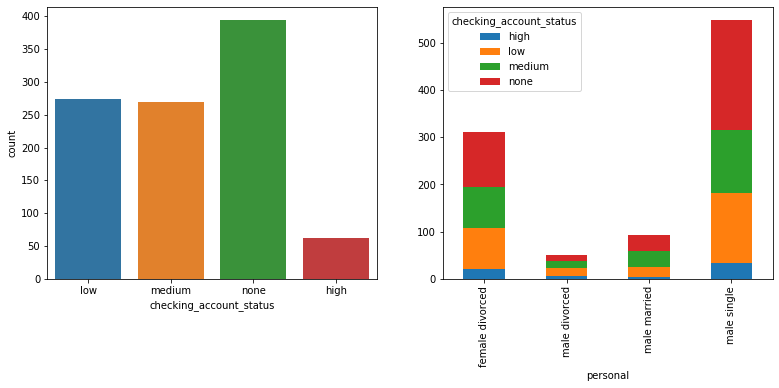

In [11]:
# checking_account_status
fig,axes = plt.subplots(1,2,figsize = (13,5))

sns.countplot(DF.checking_account_status, ax = axes[0])

accountstatus_gender = DF.groupby(['checking_account_status','personal']).size().reset_index().pivot(columns = 'checking_account_status',index = 'personal',values=0)
accountstatus_gender.plot(kind = 'bar', stacked = True, ax = axes[1])
display_side_by_side(accountstatus_gender)

- In general most of the customers having < 0 DM account status
- when compared to male, female customers are having good propotion in high (200 DM / salary assignments for at least 1 year)
- Note : Male customers are dominating in applying credit

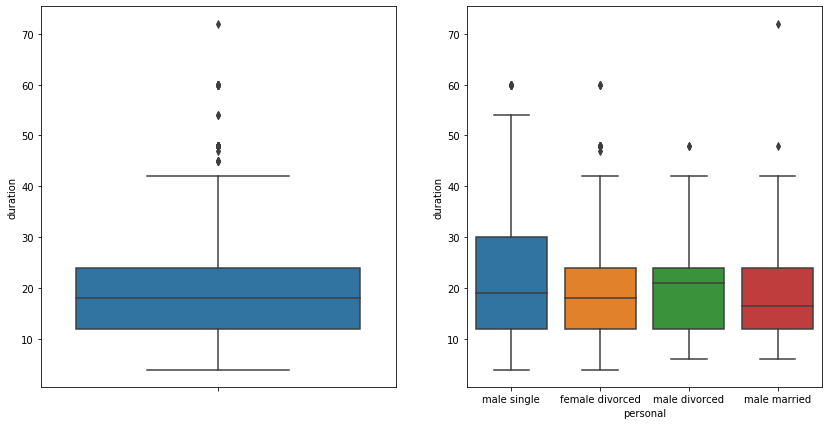

In [12]:
fig,axes = plt.subplots(1,2,figsize = (14,7))

# What is the distribution in duration
sns.boxplot(DF.duration, orient='v', ax = axes[0])

# Whether duration differs gender wise
sns.boxplot(x = DF.personal, y = DF.duration, ax = axes[1])

- Duration data is more consistent but slighly right skewed because of outliers
- Most of the customers prefer 12 - 24 months duration
- Many outliers are after 42 months
- 72 is the maximum duration, lets see who took this.

- Male divorced customers having relatively high duration when compared to others
- Male married has relatively low  duration may be of co-applicant or other debtors and having outlier at 72
- Single male has high variation and dispersion after 20 months duration
- Female has more consistent data
- High duration more likely get default ? lets find it

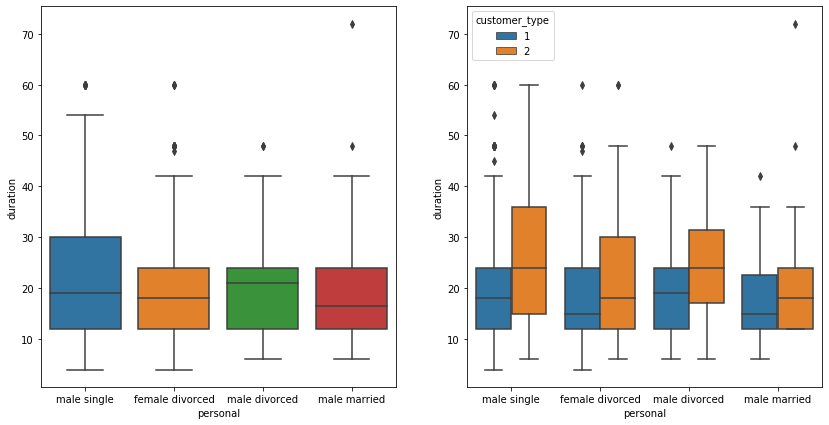

In [13]:
fig,axes = plt.subplots(1,2,figsize = (14,7))
#  Duration

sns.boxplot(x = DF.personal, y = DF.duration, ax = axes[0])
sns.boxplot(x = DF.personal, y = DF.duration, hue= DF.customer_type, ax = axes[1])

- All genders are equally likely to get classifed as good risk
- Male sinlge has high chance to get as bad risk if the duration increases
- Across the gender groups, more likely classifed as good risk are more consistent and centered around 1 -2 years of credit duration
- Female and male married good risk group has mean of low duration
- 60 months duration customers are more likely in good risk
- 72 months is the highest duration classified as bad risk
- Bad risk customer group has high variability and dispersion and their median values are always high than the good risk genders

Existing Credits    530
Critical            293
Delay in Past        88
Paid Credits         49
No Credits           40
Name: credit_history, dtype: int64


credit_history,Critical,Delay in Past,Existing Credits,No Credits,Paid Credits
personal,,,,,
female divorced,79,16,186,12,17
male divorced,13,5,28,2,2
male married,20,8,60,2,2
male single,181,59,256,24,28


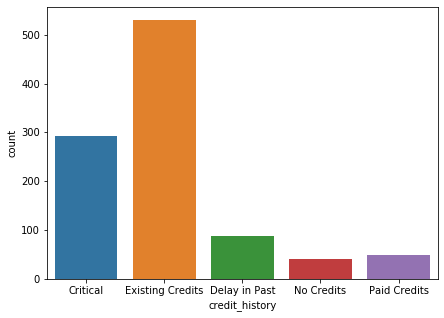

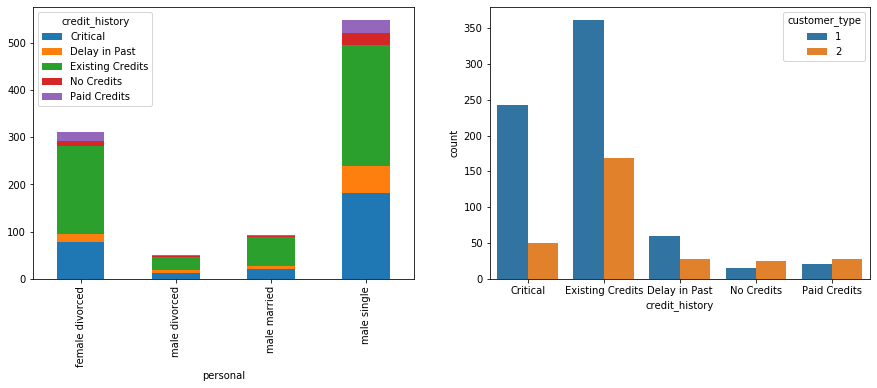

In [14]:
# Credit history

plt.figure(figsize=(7,5))
sns.countplot(DF.credit_history)
print(DF.credit_history.value_counts())

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_CreditHistory = DF.groupby(['personal','credit_history']).size().reset_index().pivot(columns = 'credit_history', index = 'personal', values=0)
Gender_CreditHistory.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.credit_history,hue = DF.customer_type, ax = axes[1])
Gender_CreditHistory

- Most of the customers are paying their existing credit duly till date
- But 30% of customers having critical/no account at this bank, Lets see their customer type
- Next to existing credits, critical/no account at this bank customers are more likely get classified as good risk

radio/television       280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: purpose, dtype: int64


purpose,business,domestic appliances,education,furniture/equipment,new car,others,radio/television,repairs,retraining,used car
personal,,,,,,,,,,
female divorced,19.0,6.0,21.0,74.0,70.0,3.0,85.0,5.0,3.0,24.0
male divorced,10.0,1.0,1.0,15.0,10.0,1.0,7.0,2.0,NaN,3.0
male married,9.0,1.0,1.0,7.0,20.0,NaN,42.0,3.0,3.0,6.0
male single,59.0,4.0,27.0,85.0,134.0,8.0,146.0,12.0,3.0,70.0


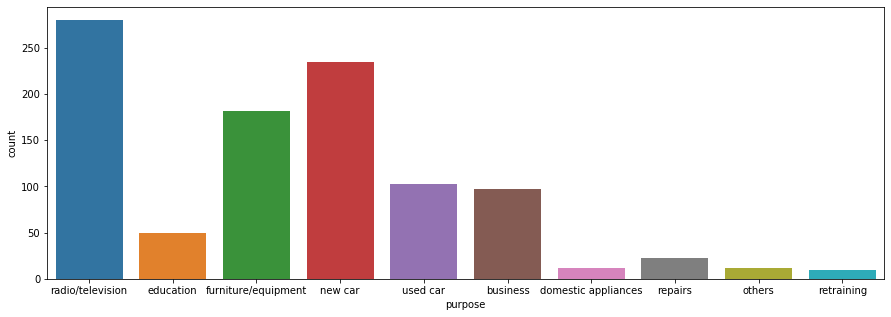

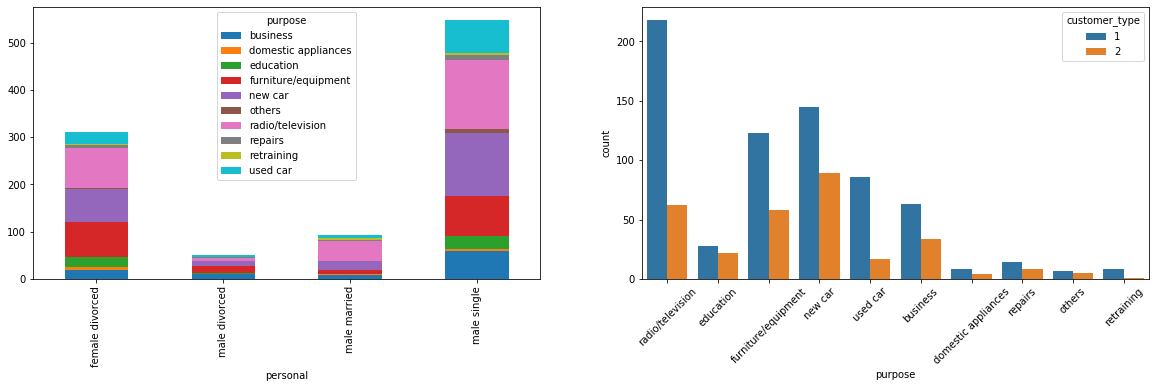

In [15]:
# Purpose
# what are the purposes people tends to apply credits ?
plt.figure(figsize=(15,5))
print(DF['purpose'].value_counts())
sns.countplot(DF.purpose)

# Who purchased what ?
fig,axes = plt.subplots(1,2,figsize=(20,5))
Gender_purpose = DF.groupby(['personal','purpose']).size().reset_index().pivot(columns = 'purpose', index = 'personal', values=0)
Gender_purpose.plot(kind = 'bar', stacked = True, ax = axes[0])
x = sns.countplot(DF.purpose,hue = DF.customer_type, ax = axes[1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)
Gender_purpose

- Most credit has been applied to buy radio/televison
- New car and furniture/equipment plays second major role
- Purchasing new car seems to be more risk when compare to others

[Text(0, 0, 'radio/television'),
 Text(0, 0, 'education'),
 Text(0, 0, 'furniture/equipment'),
 Text(0, 0, 'new car'),
 Text(0, 0, 'used car'),
 Text(0, 0, 'business'),
 Text(0, 0, 'domestic appliances'),
 Text(0, 0, 'repairs'),
 Text(0, 0, 'others'),
 Text(0, 0, 'retraining')]

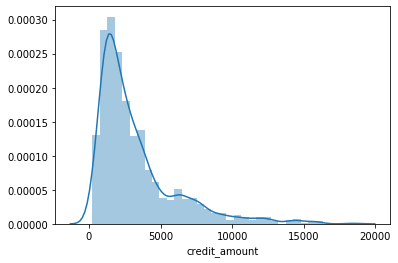

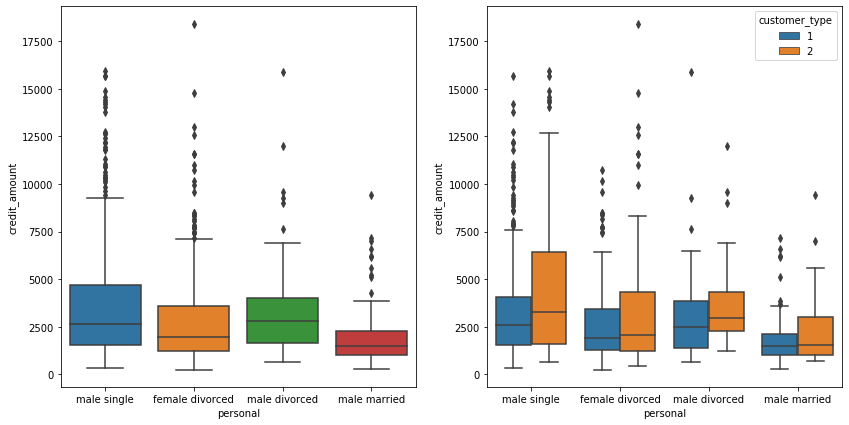

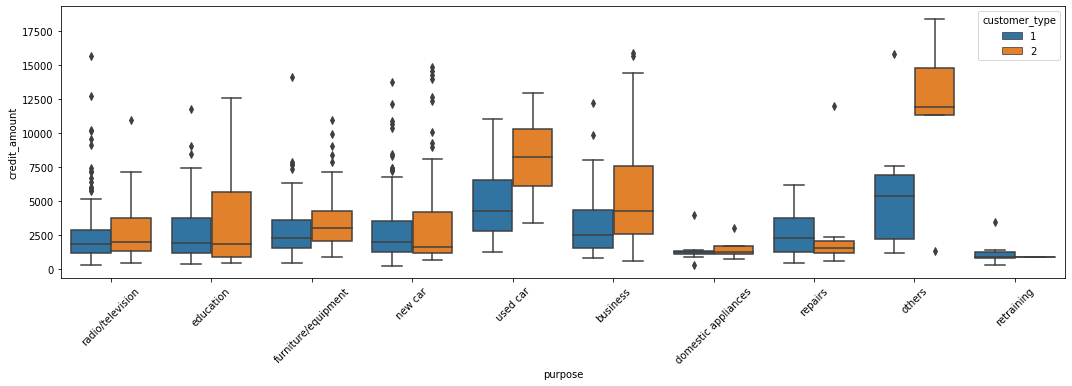

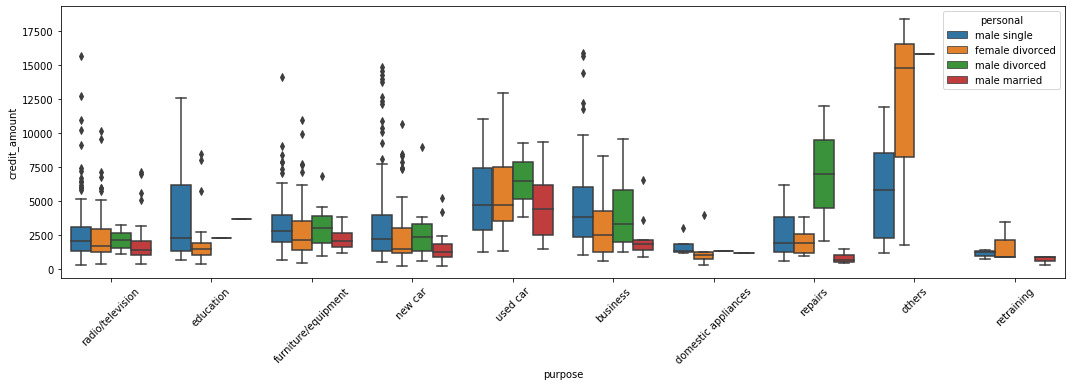

In [16]:
# Credit amount

# what is the distribution of credit amount
sns.distplot(DF.credit_amount)
DF.credit_amount.describe()

# Genderwise credit amount
fig,axes = plt.subplots(1,2,figsize = (14,7))
sns.boxplot(x = DF.personal, y = DF.credit_amount,ax = axes[0])

# Customer type credit amount distribution
sns.boxplot(x = DF.personal, y = DF.credit_amount, hue= DF.customer_type, ax = axes[1])

plt.figure(figsize=(18,5))
x = sns.boxplot(x = DF.purpose, y = DF.credit_amount, hue= DF.customer_type)
x.set_xticklabels(x.get_xticklabels(), rotation=45)

plt.figure(figsize=(18,5))
x = sns.boxplot(x = DF.purpose, y = DF.credit_amount, hue= DF.personal)
x.set_xticklabels(x.get_xticklabels(), rotation=45)

- Mean is high when comared to median because of outliers
- Half of the customers are centered around 2319 DM credit
- Huge variation is upper 25%,Range is really high lets explore it


- Male married has lowest credit amount,thats the reasion they prefered low duration
- male divorced has highest mean credit amount when compared to others and has highest mean duration as well
- 50% of female customers opted below 2000DM credit amount and some variability in the upper 50%
- Male single customers variation is high in upper 50 %

- Customers opted credit for others ai at very bad risk
- Purchasing used card for high credit results in bad risk


- Male divorced has highest median in credit amount for radio/tv,furniture,new car, used car and repairs
- Female customers has applied more credits in others and used cars
- Others and used cars with high credit amounts will more likely to be classified more risky purpose of credit

savings,high,low,medium,no savings,very high
personal,,,,,
female divorced,16,194,32,49,19
male divorced,4,30,6,6,4
male married,7,58,11,12,4
male single,36,321,54,116,21


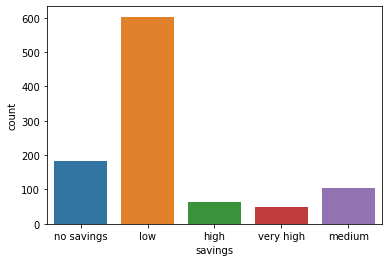

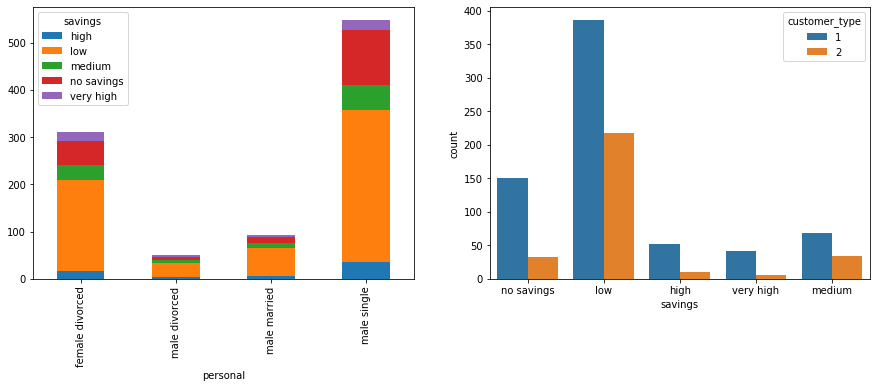

In [17]:
# Savings account

# which savings account is high
sns.countplot(DF.savings)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_savings = DF.groupby(['personal','savings']).size().reset_index().pivot(columns = 'savings', index = 'personal', values=0)
Gender_savings.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.savings,hue = DF.customer_type, ax = axes[1])
Gender_savings

- Most of the customers has very low amount in savings (< 100 DM), lets see who are they
- Female are good in savings 


present_employment,Unemployed,high,low,medium,senior
personal,,,,,
female divorced,23,47,86,107,47
male divorced,3,13,11,19,4
male married,4,12,23,38,15
male single,32,181,52,175,108


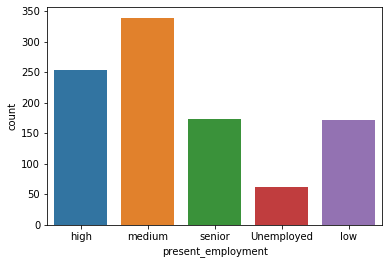

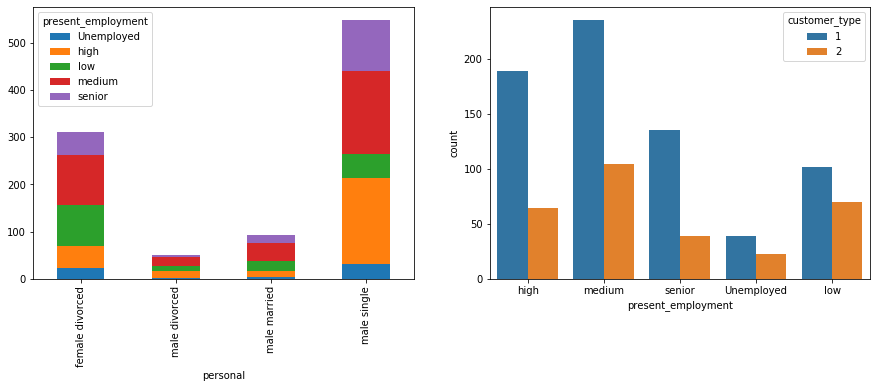

In [18]:
# present_employment
sns.countplot(DF.present_employment)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_experience = DF.groupby(['personal','present_employment']).size().reset_index().pivot(columns = 'present_employment', index = 'personal', values=0)
Gender_experience.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.present_employment,hue = DF.customer_type, ax = axes[1])
Gender_experience

- < 4 years and > 7 years of experience customers are high in numbers
- Female customers are the highest one having less than 1 year experience
- Customers having less than one year experience are more likely to be default


installment_rate,1.0,2.0,3.0,4.0
personal,,,,
female divorced,63,65,44,138
male divorced,11,18,6,15
male married,11,21,17,43
male single,51,127,90,280


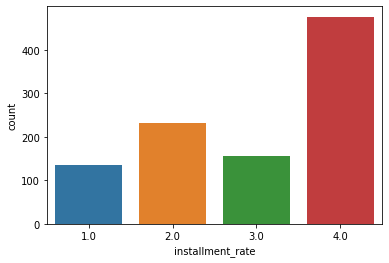

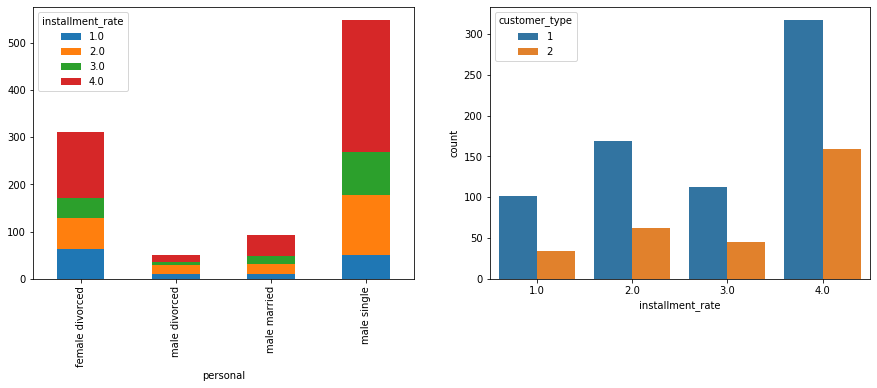

In [19]:
# installment_rate
sns.countplot(DF.installment_rate)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_installment = DF.groupby(['personal','installment_rate']).size().reset_index().pivot(columns = 'installment_rate', index = 'personal', values=0)
Gender_installment.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.installment_rate,hue = DF.customer_type, ax = axes[1])
Gender_installment

other_debtors,co-applicant,guarantor,none
personal,,,
female divorced,12,15,283
male divorced,1,1,48
male married,3,8,81
male single,25,28,495


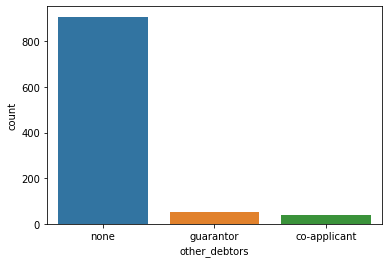

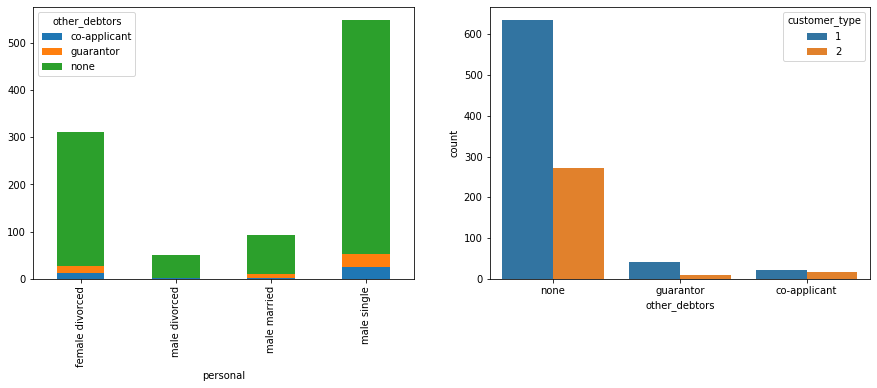

In [20]:
# installment_rate
sns.countplot(DF.other_debtors)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_debtors = DF.groupby(['personal','other_debtors']).size().reset_index().pivot(columns = 'other_debtors', index = 'personal', values=0)
Gender_debtors.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.other_debtors,hue = DF.customer_type, ax = axes[1])
Gender_debtors

present_residence,1.0,2.0,3.0,4.0
personal,,,,
female divorced,50,83,35,142
male divorced,10,15,7,18
male married,16,34,23,19
male single,54,176,84,234


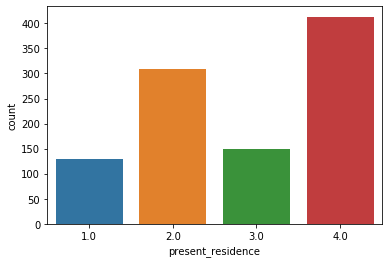

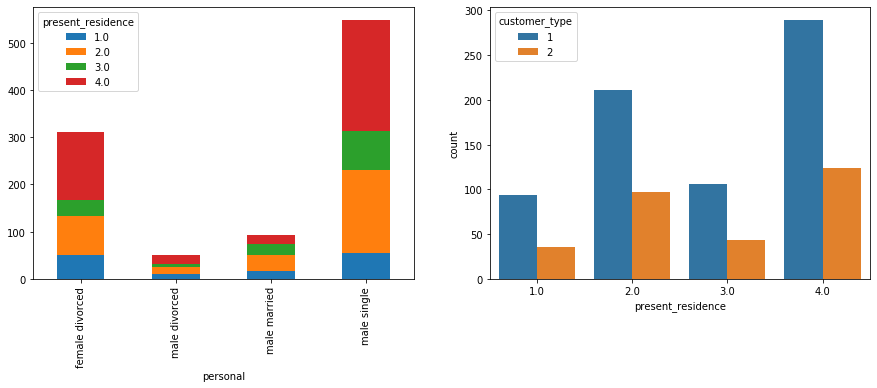

In [21]:
# installment_rate
sns.countplot(DF.present_residence)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_residence = DF.groupby(['personal','present_residence']).size().reset_index().pivot(columns = 'present_residence', index = 'personal', values=0)
Gender_residence.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.present_residence,hue = DF.customer_type, ax = axes[1])
Gender_residence

property,car or other,life insurance,no property,real estate
personal,,,,
female divorced,109,79,33,89
male divorced,18,10,5,17
male married,28,19,2,43
male single,177,124,114,133


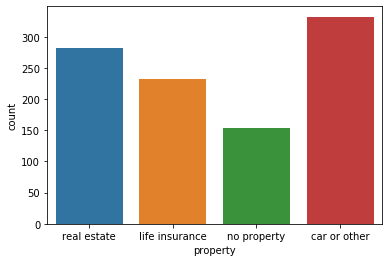

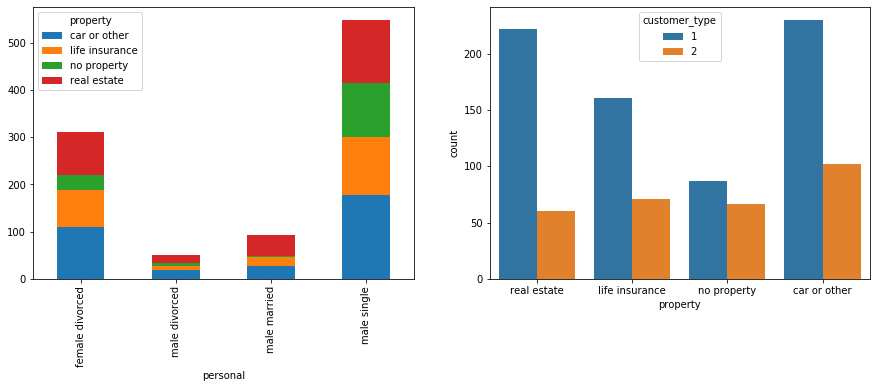

In [22]:
# property
sns.countplot(DF.property)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_property = DF.groupby(['personal','property']).size().reset_index().pivot(columns = 'property', index = 'personal', values=0)
Gender_property.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.property,hue = DF.customer_type, ax = axes[1])
Gender_property

- Car or other most customers use this property to apply credit
- real estate holds the Second highest 

- Life insurance propert mor likely to get classified as bad risk after car or other

other_installment_plans,bank,none,stores
personal,,,
female divorced,40,260,10
male divorced,5,44,1
male married,12,77,3
male single,82,433,33


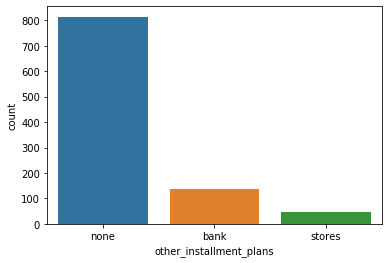

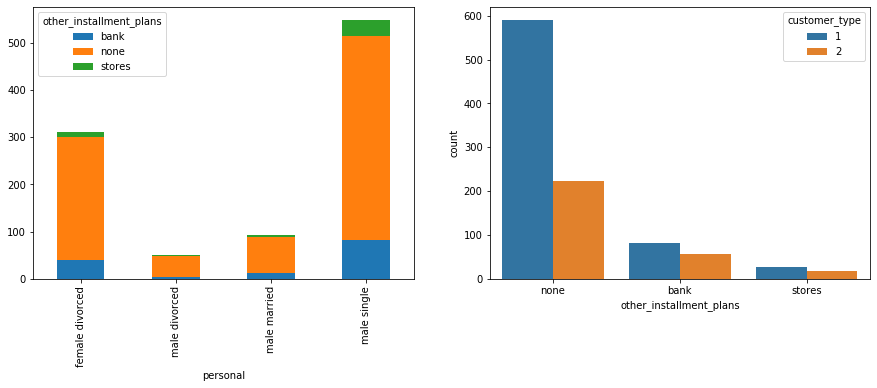

In [23]:
# other_installment_plans
sns.countplot(DF.other_installment_plans)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_otherinstallment = DF.groupby(['personal','other_installment_plans']).size().reset_index().pivot(columns = 'other_installment_plans', index = 'personal', values=0)
Gender_otherinstallment.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.other_installment_plans,hue = DF.customer_type, ax = axes[1])
Gender_otherinstallment

housing,free,own,rent
personal,,,
female divorced,19,196,95
male divorced,3,41,6
male married,1,68,23
male single,85,408,55


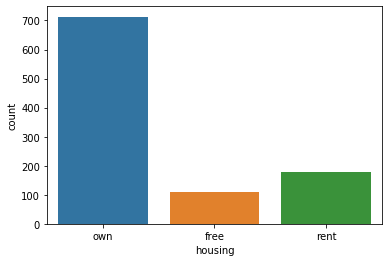

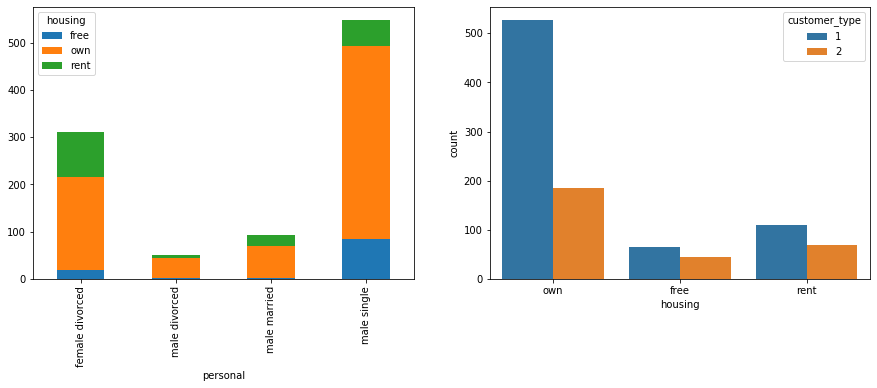

In [24]:
# housing
sns.countplot(DF.housing)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_housing = DF.groupby(['personal','housing']).size().reset_index().pivot(columns = 'housing', index = 'personal', values=0)
Gender_housing.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.housing,hue = DF.customer_type, ax = axes[1])
Gender_housing

- Most of the customers own their house
- Female customers are more in rental houses when compared to others

existing_credits,1.0,2.0,3.0,4.0
personal,,,,
female divorced,217.0,87.0,4.0,2.0
male divorced,33.0,17.0,NaN,NaN
male married,63.0,26.0,3.0,NaN
male single,320.0,203.0,21.0,4.0


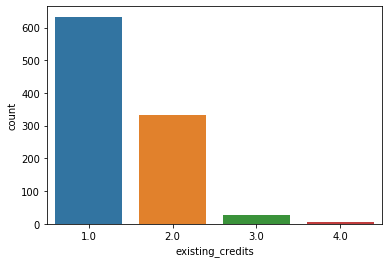

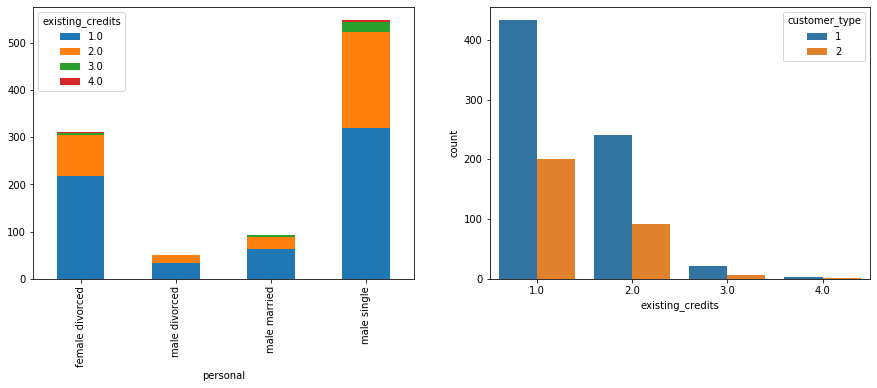

In [25]:
# existing_credits
sns.countplot(DF.existing_credits)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_credits = DF.groupby(['personal','existing_credits']).size().reset_index().pivot(columns = 'existing_credits', index = 'personal', values=0)
Gender_credits.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.existing_credits,hue = DF.customer_type, ax = axes[1])
Gender_credits

job,management/officer,skilled employee,unskilled - non-resident,unskilled - resident
personal,,,,
female divorced,37.0,197.0,12.0,64.0
male divorced,11.0,31.0,NaN,8.0
male married,6.0,62.0,2.0,22.0
male single,94.0,340.0,8.0,106.0


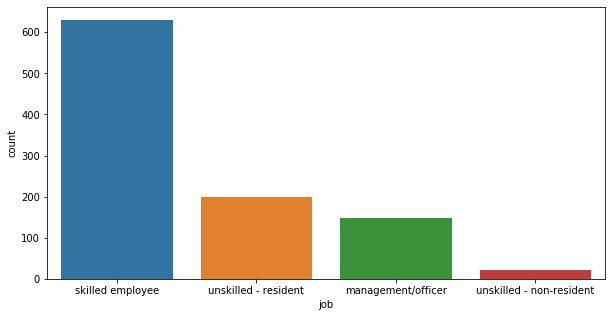

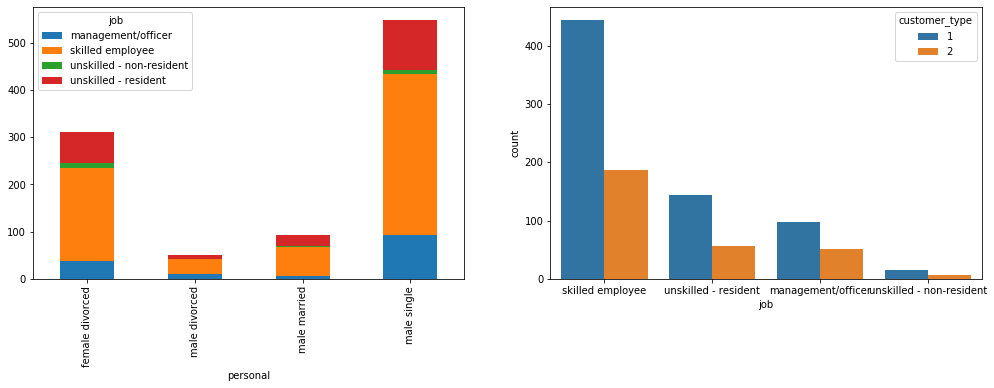

In [26]:
# job
plt.figure(figsize=(10,5))
sns.countplot(DF.job)

fig,axes = plt.subplots(1,2,figsize=(17,5))
Gender_job = DF.groupby(['personal','job']).size().reset_index().pivot(columns = 'job', index = 'personal', values=0)
Gender_job.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.job,hue = DF.customer_type, ax = axes[1])
Gender_job

dependents,1,2
personal,,
female divorced,296,14
male divorced,47,3
male married,90,2
male single,412,136


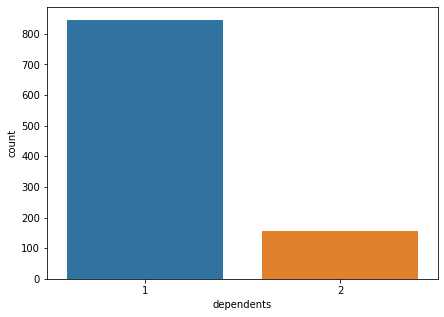

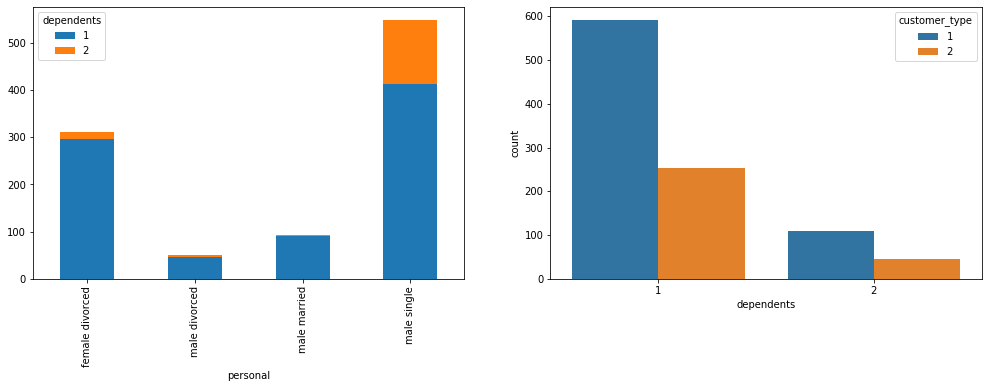

In [27]:
# dependents
plt.figure(figsize=(7,5))
sns.countplot(DF.dependents)

fig,axes = plt.subplots(1,2,figsize=(17,5))
Gender_dependents = DF.groupby(['personal','dependents']).size().reset_index().pivot(columns = 'dependents', index = 'personal', values=0)
Gender_dependents.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.dependents,hue = DF.customer_type, ax = axes[1])
Gender_dependents

telephone,none,yes
personal,,
female divorced,202,108
male divorced,28,22
male married,59,33
male single,307,241


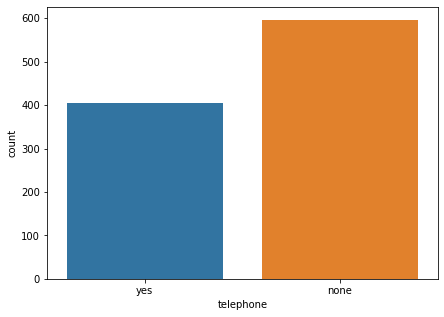

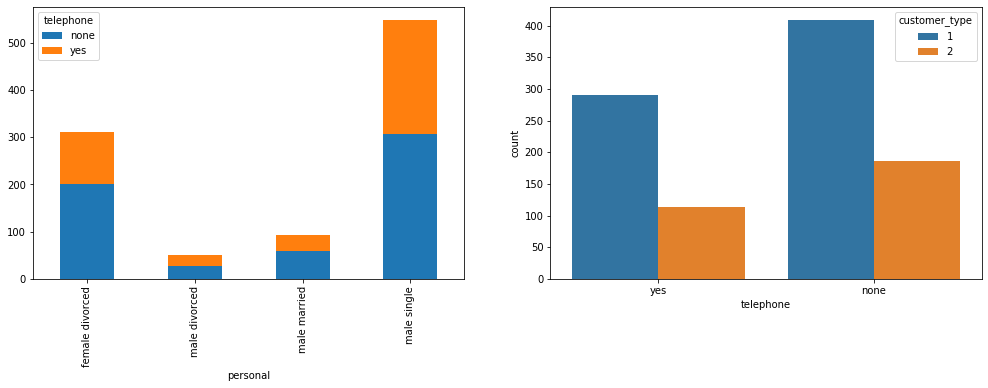

In [28]:

# telephone
plt.figure(figsize=(7,5))
sns.countplot(DF.telephone)

fig,axes = plt.subplots(1,2,figsize=(17,5))
Gender_telephone = DF.groupby(['personal','telephone']).size().reset_index().pivot(columns = 'telephone', index = 'personal', values=0)
Gender_telephone.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.telephone,hue = DF.customer_type, ax = axes[1])
Gender_telephone

foreign_worker,no,yes
personal,,
female divorced,7,303
male divorced,1,49
male married,6,86
male single,23,525


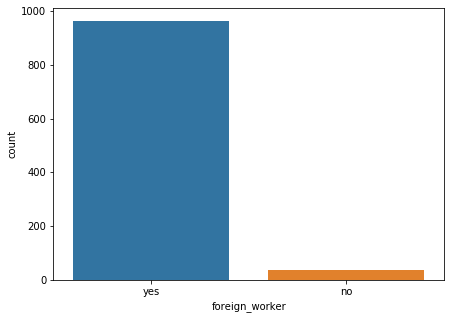

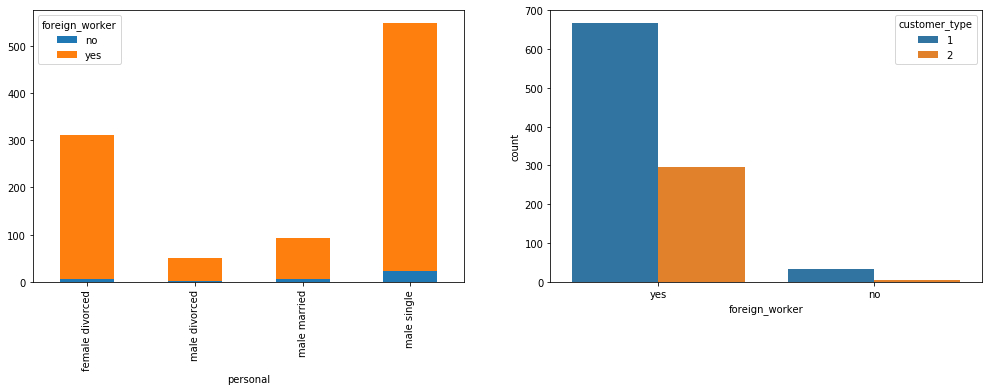

In [29]:
# foreign_worker
plt.figure(figsize=(7,5))
sns.countplot(DF.foreign_worker)

fig,axes = plt.subplots(1,2,figsize=(17,5))
Gender_foreign = DF.groupby(['personal','foreign_worker']).size().reset_index().pivot(columns = 'foreign_worker', index = 'personal', values=0)
Gender_foreign.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.foreign_worker,hue = DF.customer_type, ax = axes[1])
Gender_foreign

# Age Analysis

age_group,elder,middle,old,young
personal,,,,
female divorced,23,93,23,171
male divorced,4,28,9,9
male married,1,28,7,56
male single,43,294,76,135


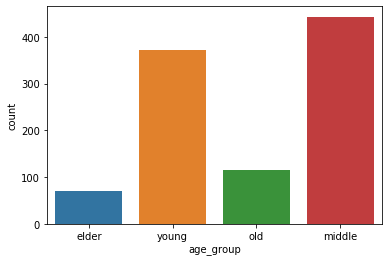

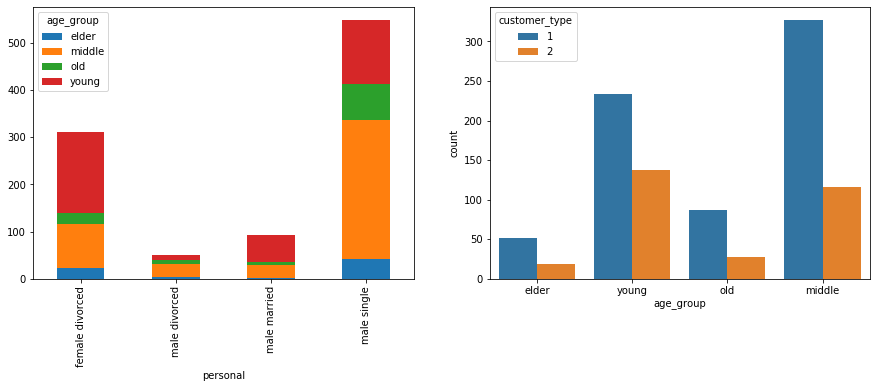

In [30]:
# Age
# property
sns.countplot(DF.age_group)

fig,axes = plt.subplots(1,2,figsize=(15,5))
Gender_age = DF.groupby(['personal','age_group']).size().reset_index().pivot(columns = 'age_group', index = 'personal', values=0)
Gender_age.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.age_group,hue = DF.customer_type, ax = axes[1])
Gender_age


- 30 - 45 years old customers applied credit more
- Most of the female are young (19 - 30 years old) who applied the credit
- Most of the male single are middle aged (30 - 45)

- Default type is more in young age group (may be still in college or started their job)
- Let's try to find why young customers are getting default more when compared to other


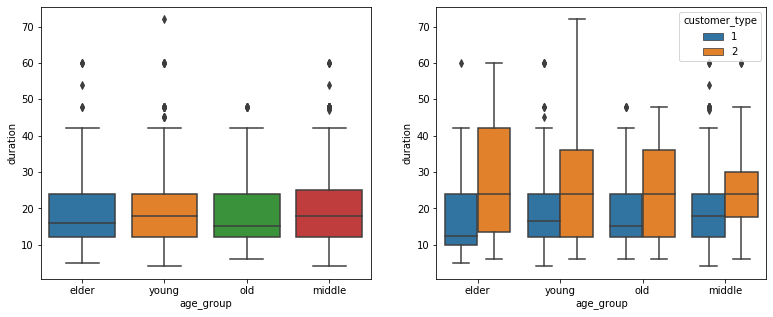

In [31]:
fig,axes = plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x = DF.age_group, y = DF.duration, ax = axes[0])
sns.boxplot(x = DF.age_group, y = DF.duration, hue= DF.customer_type, ax = axes[1])

- All the age groups having consistent  and mean durationaround 12 - 24 months
- young customer having the highest duration as 72 months
- elder and old having lower median

radio/television       280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: purpose, dtype: int64


purpose,business,domestic appliances,education,furniture/equipment,new car,others,radio/television,repairs,retraining,used car
age_group,,,,,,,,,,
elder,9.0,1.0,6.0,3.0,19.0,2.0,19.0,3.0,NaN,9.0
middle,47.0,2.0,22.0,74.0,117.0,6.0,111.0,7.0,7.0,50.0
old,5.0,2.0,10.0,20.0,27.0,1.0,33.0,4.0,NaN,13.0
young,36.0,7.0,12.0,84.0,71.0,3.0,117.0,8.0,2.0,31.0


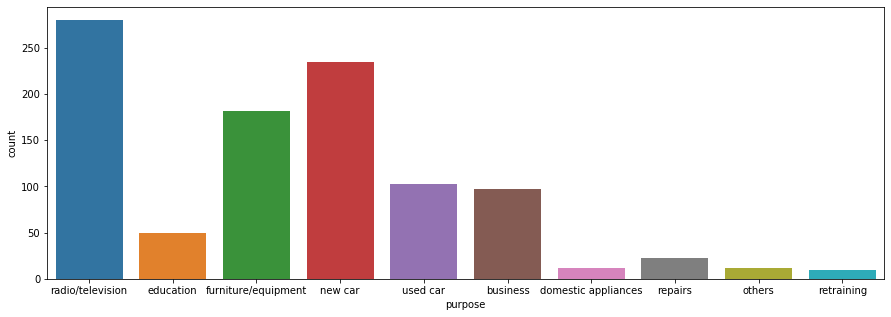

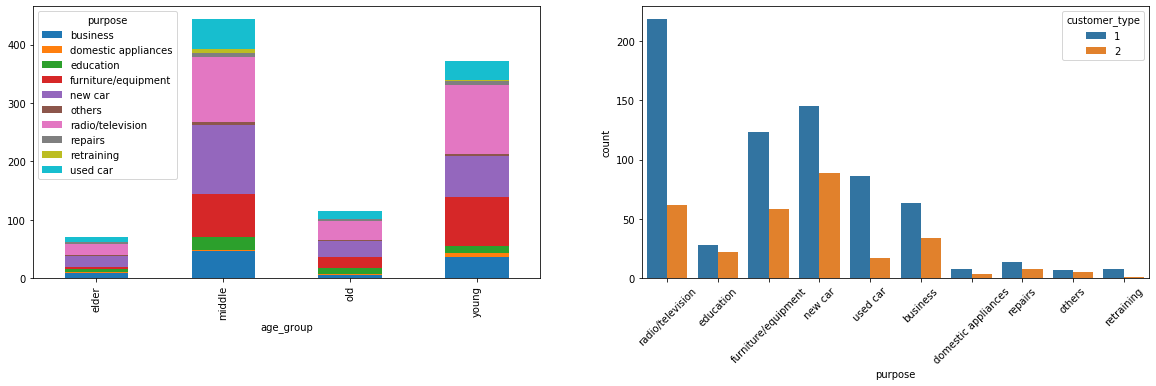

In [32]:
# Purpose
# what are the purposes people tends to apply credits ?
plt.figure(figsize=(15,5))
print(DF['purpose'].value_counts())
sns.countplot(DF.purpose)

# Who purchased what ?
fig,axes = plt.subplots(1,2,figsize=(20,5))
age_purpose = DF.groupby(['age_group','purpose']).size().reset_index().pivot(columns = 'purpose', index = 'age_group', values=0)
age_purpose.plot(kind = 'bar', stacked = True, ax = axes[0])
x = sns.countplot(DF.purpose,hue = DF.customer_type, ax = axes[1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)
age_purpose

- young customers applied credit for most of the purpose like Domestic appliances,furniture/equipment and radio/tv

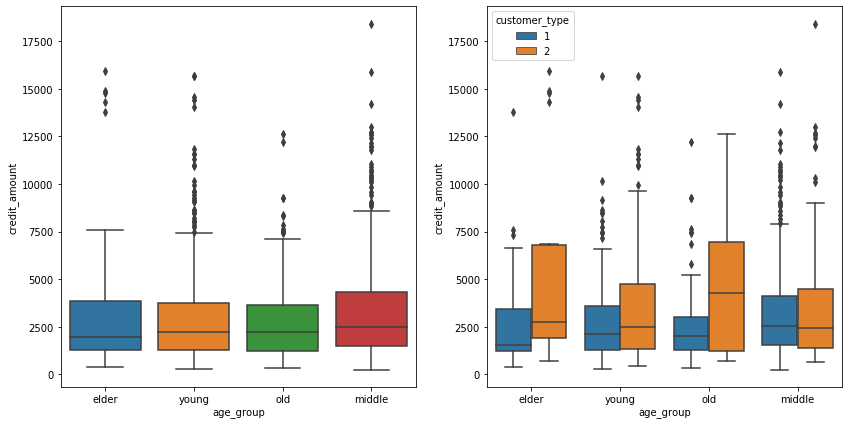

In [33]:
# Genderwise credit amount
fig,axes = plt.subplots(1,2,figsize = (14,7))
sns.boxplot(x = DF.age_group, y = DF.credit_amount,ax = axes[0])

# Customer type credit amount distribution
sns.boxplot(x = DF.age_group, y = DF.credit_amount, hue= DF.customer_type, ax = axes[1])

present_employment,Unemployed,high,low,medium,senior
age_group,,,,,
elder,11,39,2,13,6
middle,25,130,59,140,89
old,8,57,10,28,12
young,18,27,101,158,67


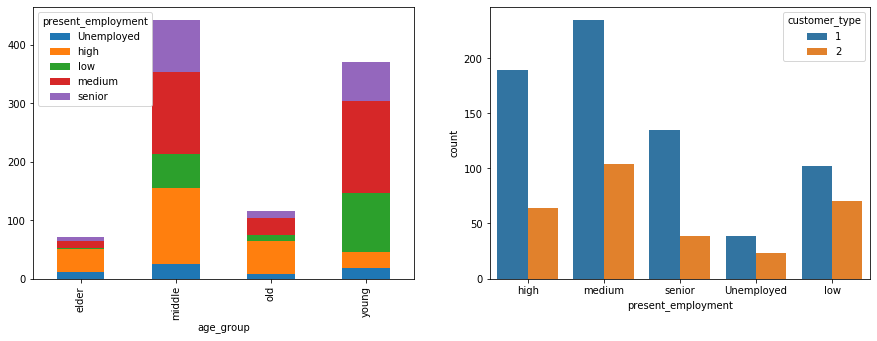

In [34]:
# present_employment
fig,axes = plt.subplots(1,2,figsize=(15,5))
age_experience = DF.groupby(['age_group','present_employment']).size().reset_index().pivot(columns = 'present_employment', index = 'age_group', values=0)
age_experience.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.present_employment,hue = DF.customer_type, ax = axes[1])
age_experience

personal,female divorced,male divorced,male married,male single
age_group,,,,
elder,23,4,1,43
middle,93,28,28,294
old,23,9,7,76
young,171,9,56,135


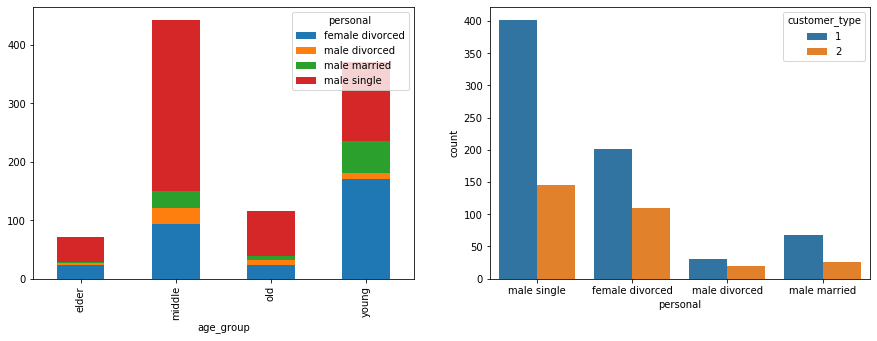

In [35]:
# personal
fig,axes = plt.subplots(1,2,figsize=(15,5))
age_gender = DF.groupby(['age_group','personal']).size().reset_index().pivot(columns = 'personal', index = 'age_group', values=0)
age_gender.plot(kind = 'bar', stacked = True, ax = axes[0])
sns.countplot(DF.personal,hue = DF.customer_type, ax = axes[1])
age_gender

job,management/officer,skilled employee,unskilled - non-resident,unskilled - resident
age_group,,,,
elder,15,33,5,18
middle,90,259,4,90
old,16,74,2,23
young,27,264,11,69


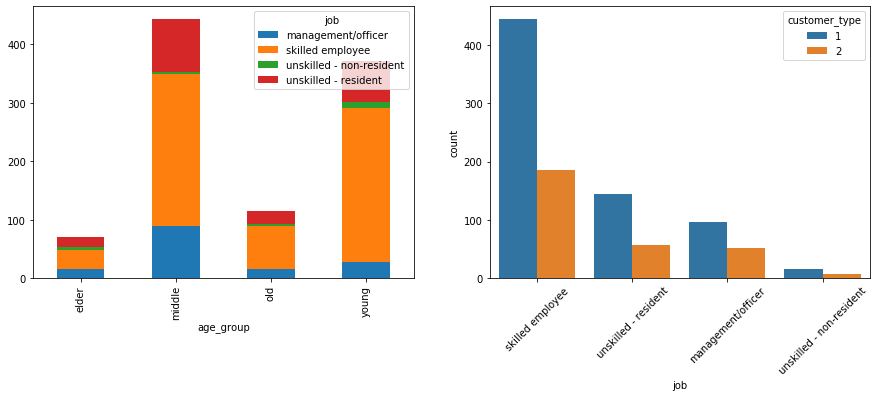

In [36]:
# job
fig,axes = plt.subplots(1,2,figsize=(15,5))
age_job = DF.groupby(['age_group','job']).size().reset_index().pivot(columns = 'job', index = 'age_group', values=0)
age_job.plot(kind = 'bar', stacked = True, ax = axes[0])
x = sns.countplot(DF.job,hue = DF.customer_type, ax = axes[1])
x.set_xticklabels(x.get_xticklabels(), rotation=45)
age_job

# Feature Engineering

In [88]:
# Creating new copy of data frame for transformation
Transform_DF = DF.copy()

# One hot encoding for nominal features
Transform_DF = pd.get_dummies(Transform_DF,columns=['credit_history','purpose','personal','other_debtors','property',\
                                                     'other_installment_plans','housing','job','age_group'],drop_first=False)

# Label encoding for ordinal features
Label_encoder = preprocessing.LabelEncoder()
Transform_DF['accountstatus_code'] = Label_encoder.fit_transform(Transform_DF['checking_account_status'])
Transform_DF['savings_code'] = Label_encoder.fit_transform(Transform_DF['savings'])
Transform_DF['presentemployment_code'] = Label_encoder.fit_transform(Transform_DF['present_employment'])
Transform_DF['telephone_code'] = Label_encoder.fit_transform(Transform_DF['telephone'])
Transform_DF['foreign_worker_code'] = Label_encoder.fit_transform(Transform_DF['foreign_worker'])
del Transform_DF['checking_account_status']
del Transform_DF['savings']
del Transform_DF['present_employment']
del Transform_DF['telephone']
del Transform_DF['foreign_worker']

# Separating our independent and dependent variables
X = Transform_DF.drop(['customer_type'],axis = 1)
y = Transform_DF['customer_type']

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

headers = X_train.columns

# Predictive Model Building

### Without Scaling, cross validation and Hyper parameters optimization

In [99]:
# First Model : Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(pd.DataFrame(confusion_matrix(y_test,y_pred),\
             columns = ['Predicted 1','Predicted 2'],\
             index = [1,2]))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# accuracy 0.75
# Simple logistic regression model without scaling, cross validation and hyper parameter optimization

   Predicted 1  Predicted 2
1          199           35
2           48           48
0.7484848484848485
              precision    recall  f1-score   support

           1       0.81      0.85      0.83       234
           2       0.58      0.50      0.54        96

    accuracy                           0.75       330
   macro avg       0.69      0.68      0.68       330
weighted avg       0.74      0.75      0.74       330



In [92]:
# Scaling
std_scale = preprocessing.StandardScaler()
# std_scale = preprocessing.MinMaxScaler()

# Transforming train data
X_train = std_scale.fit_transform(X_train)

# Transforming test data
X_test = std_scale.fit_transform(X_test)

### Hyperparameter choosing using GridSearchCV

### Logistic regression

In [94]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

# Choosing regularization parameter
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

# Choosing the penalities
penalities = ['l1','l2']

# Choosing cross validation startegy
cv = StratifiedShuffleSplit(n_splits=10,test_size=.25)

# Setting param for param_grid in Gridsearchcv
param = {'penalty':penalities,'C':C_vals}

logreg = LogisticRegression()
grid = GridSearchCV(estimator=LogisticRegression(),\
                    param_grid=param, scoring='accuracy',\
                    n_jobs=-1,cv=cv)
# Fitting the model
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7356
{'C': 0.2, 'penalty': 'l2'}
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Using the best parameters in Logistic regression

In [101]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.774

In [102]:
# Logistic Regression accuracy score :
# Before tuning : 0.75
# After tuning : 0.77
# Definite improvement